### KELOMPOK 6 ( DATA SET KEPUASAN KONSUMEN)

2208541020 Ni Wayan Atik Febriyanti

2208541025 Ni Luh Putu Gita Herlina Sari 

2208541028 Ruth Sani Manik

2208541035 Indah Nur Aliza 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")

### Membaca Dataset

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/imdwipayana/DATA/main/Dataset%20Final%20Project%202023/Kepuasan_Konsumen/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/imdwipayana/DATA/main/Dataset%20Final%20Project%202023/Kepuasan_Konsumen/test.csv")

### Train Dataset

In [3]:
#Get Number of records and columns
print(train.shape)
train.head(10)

(103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [4]:
# Drop unnecessary columns
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
# Check size of the data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

### Test Dataset

In [5]:
# Get Number of records and columns
print(test.shape)
test.head(10)

(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [6]:
# Drop unnecessary columns
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)
# Check size of the data set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

### Mengganti spasi dalam nama kolom dengan garis bawah - Data Train dan Data Test

In [7]:
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

### Mengganti nilai kolom label "satisfaction" dengan 0 dan 1 (netral atau tidak puas = 0 dan puas = 1) - Data Train dan Data Test

In [8]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

### Memeriksa Dataset seimbang atau tidak seimbang

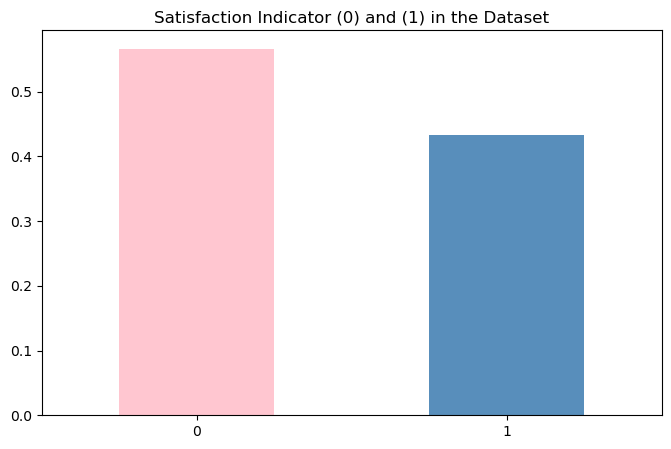

In [9]:
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['pink','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

Plot di atas menunjukkan bahwa distribusi sekitar 55:45 antara penumpang yang netral/tidak puas dan penumpang yang puas. Oleh karena itu, data ini dianggap seimbang dan tidak memerlukan metode resampling khusus untuk diimplementasikan.

### Penanganan data yang hilang

In [10]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984
Gender,0,0.000000
Seat_comfort,0,0.000000
Departure_Delay_in_Minutes,0,0.000000
Cleanliness,0,0.000000


In [11]:
# Check the list of categorical variables
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [12]:
# Replace NaN with mode for categorical variables - Train and Test

train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

### Analisis Data Eksploratif

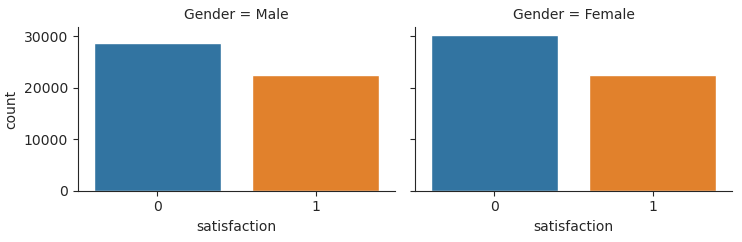

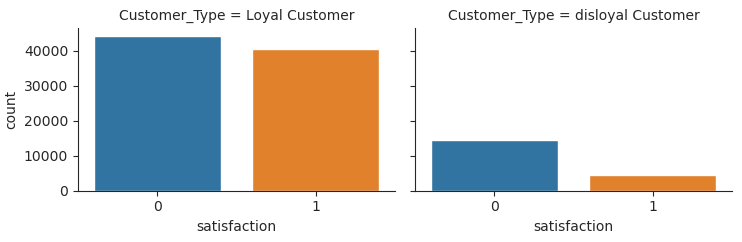

In [13]:
# Gender and Customer type
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)

**Jenis Kelamin:** <br/>
Teramati bahwa distribusi jenis kelamin antara penumpang yang netral/tidak puas dan penumpang yang puas cukup mirip. Baik untuk penumpang pria maupun wanita, jumlah penumpang yang netral/tidak puas lebih tinggi dibandingkan dengan jumlah penumpang yang puas.

**Tipe Pelanggan:** <br/>
Di antara penumpang yang setia yang jumlahnya tinggi, rasio penumpang yang puas dan netral/tidak puas hampir seimbang, yaitu sekitar 49:51.

Ini menyatakan bahwa dalam hal jenis kelamin, distribusi penumpang yang netral/tidak puas dan penumpang yang puas cukup serupa, baik untuk penumpang pria maupun wanita. Baik jumlah penumpang pria maupun wanita yang merasa netral/tidak puas lebih tinggi dibandingkan dengan jumlah penumpang yang merasa puas.

Selain itu, meskipun ada banyak penumpang yang setia, rasio antara penumpang yang puas dan netral/tidak puas hampir seimbang, dengan perbandingan sekitar 49:51.

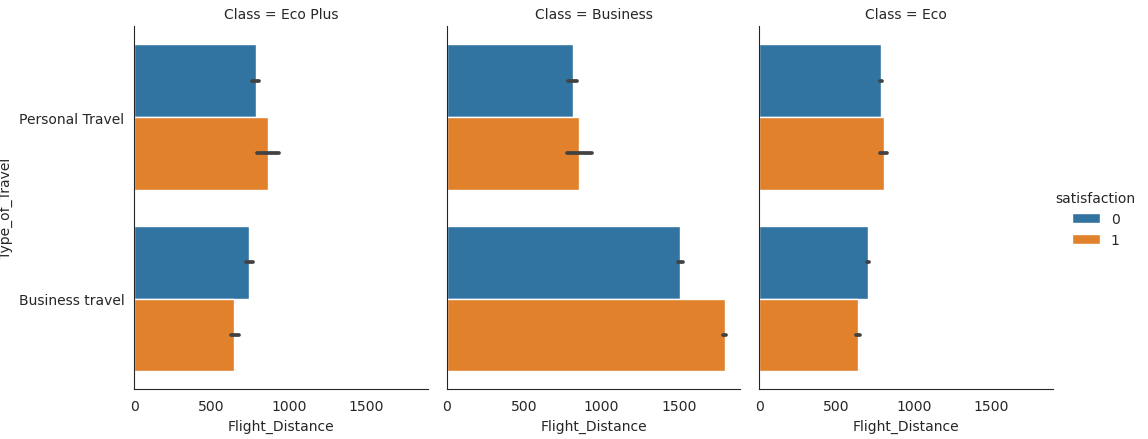

In [14]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

Untuk jenis perjalanan dan jarak penerbangan yang dikelompokkan berdasarkan kelas:

Untuk perjalanan bisnis dalam kategori kelas bisnis, jumlah penumpang yang puas cukup tinggi untuk jarak penerbangan yang lebih jauh. Untuk kombinasi lainnya, distribusi penumpang yang puas dan netral/tidak puas hampir sama.
Ini menyatakan bahwa dalam kasus perjalanan bisnis dalam kategori kelas bisnis, jumlah penumpang yang puas cukup tinggi untuk jarak penerbangan yang lebih jauh. Namun, untuk kombinasi lainnya, distribusi antara penumpang yang puas dan netral/tidak puas hampir sama.

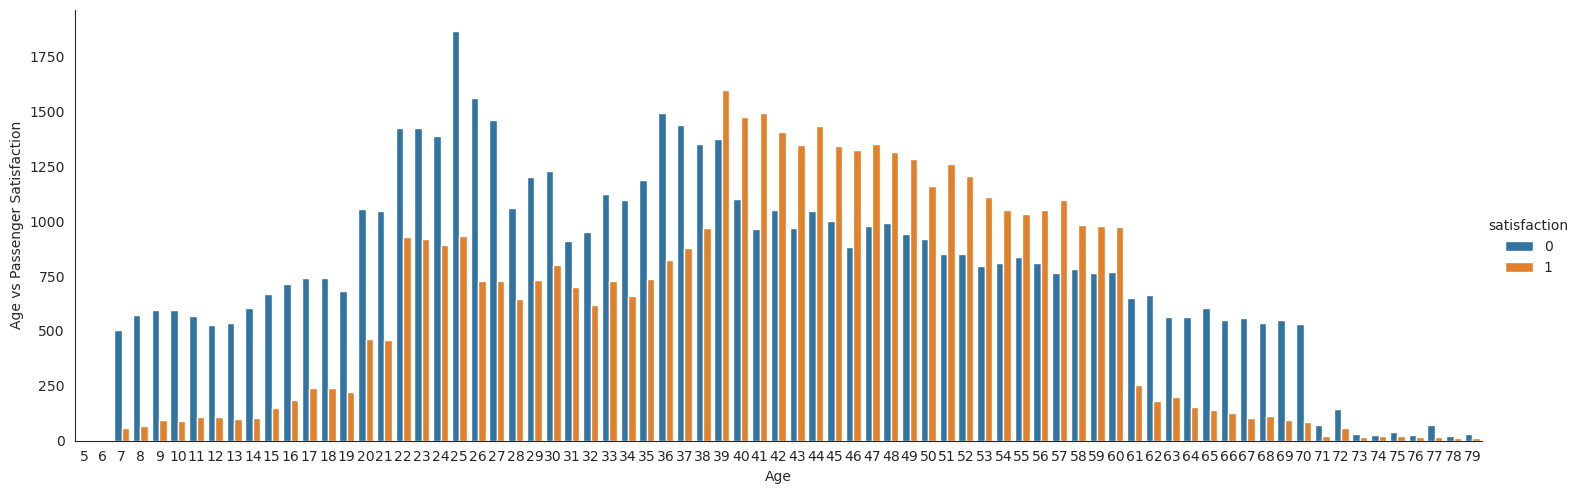

In [15]:
# Age
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

Dari rentang usia 7 hingga 38 tahun dan dari rentang usia 61 hingga 79 tahun, jumlah penumpang yang netral/tidak puas sangat tinggi dibandingkan dengan penumpang yang puas. Di sisi lain, dalam kelompok usia 39-60 tahun, jumlah penumpang yang puas lebih tinggi dibandingkan dengan penumpang yang netral/tidak puas.dalam rentang usia 7 hingga 38 tahun dan 61 hingga 79 tahun, jumlah penumpang yang netral/tidak puas sangat tinggi dibandingkan dengan jumlah penumpang yang puas. Namun, dalam kelompok usia 39-60 tahun, jumlah penumpang yang puas lebih tinggi dibandingkan dengan jumlah penumpang yang netral/tidak puas.

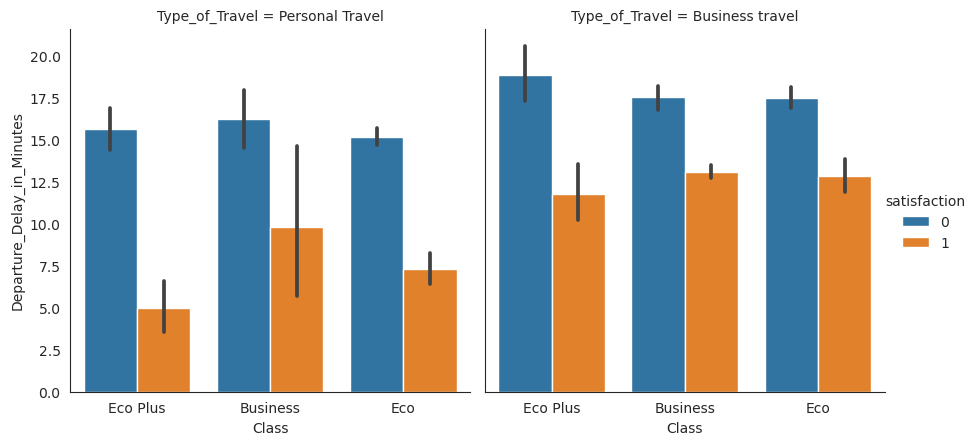

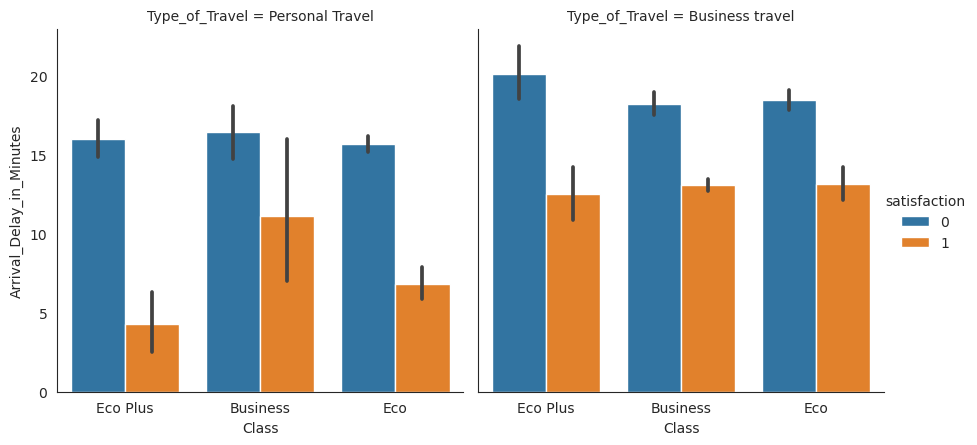

In [16]:
# Departure_Delay and Arrival Delay by Type_of_Travel
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)

Untuk jenis perjalanan pribadi (terutama untuk kelas Eco Plus dan Eco), jumlah penumpang netral/tidak puas sangat tinggi ketika keterlambatan kedatangan tinggi, yang cukup wajar. Dalam perbandingan per menit, semua kombinasi memiliki jumlah penumpang netral/tidak puas yang lebih tinggi dibandingkan dengan jumlah penumpang yang puas. untuk jenis perjalanan pribadi, terutama untuk kelas Eco Plus dan Eco, jumlah penumpang netral/tidak puas sangat tinggi ketika terjadi keterlambatan kedatangan yang tinggi. Dalam perbandingan per menit, semua kombinasi memiliki jumlah penumpang netral/tidak puas yang lebih tinggi dibandingkan dengan jumlah penumpang yang puas.

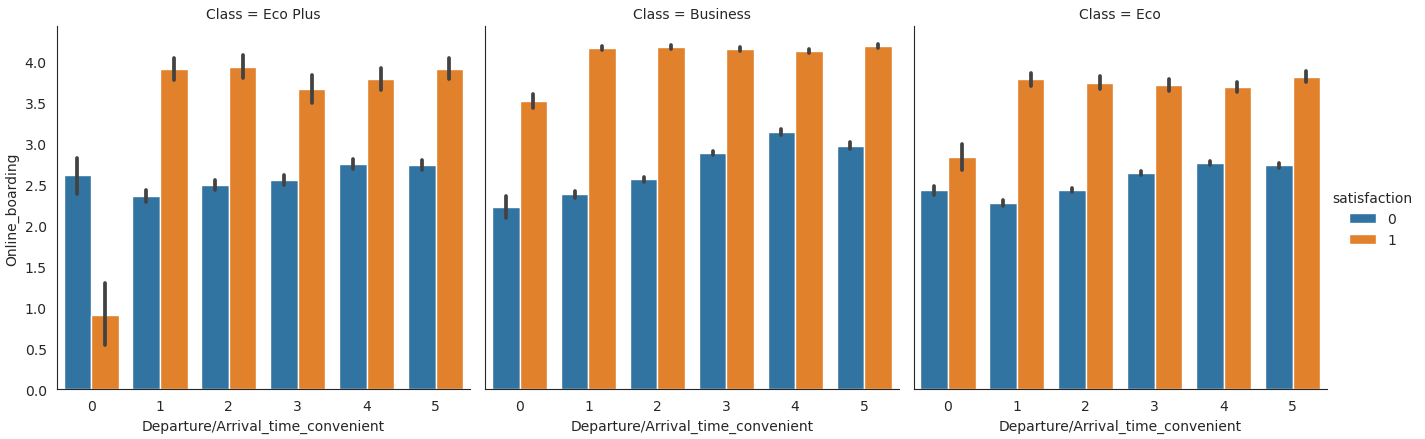

In [17]:
# Online_boarding and Departure/Arrival_time_convenient by class
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=1.0)

Untuk Layanan Online Boarding dan Kemudahan Waktu Keberangkatan/Kedatangan (Departure/Arrival Time Convenience) yang dikelompokkan berdasarkan Kelas:

Untuk kelas Eco Plus, keberangkatan/kedatangan yang sangat tidak nyaman (Departure/Arrival_time_convenient = 0) memiliki jumlah penumpang netral/tidak puas yang tinggi, bahkan ketika layanan online boarding berada di sisi positif. Untuk kombinasi lainnya, jumlah penumpang yang puas lebih tinggi dibandingkan dengan jumlah penumpang yang netral/tidak puas.hal Layanan Online Boarding dan Kemudahan Waktu Keberangkatan/Kedatangan, untuk penumpang kelas Eco Plus, keberangkatan/kedatangan yang sangat tidak nyaman memiliki jumlah penumpang netral/tidak puas yang tinggi, meskipun layanan online boarding berada di sisi positif. Sedangkan untuk kombinasi lainnya, jumlah penumpang yang puas lebih tinggi dibandingkan dengan jumlah penumpang yang netral/tidak puas.

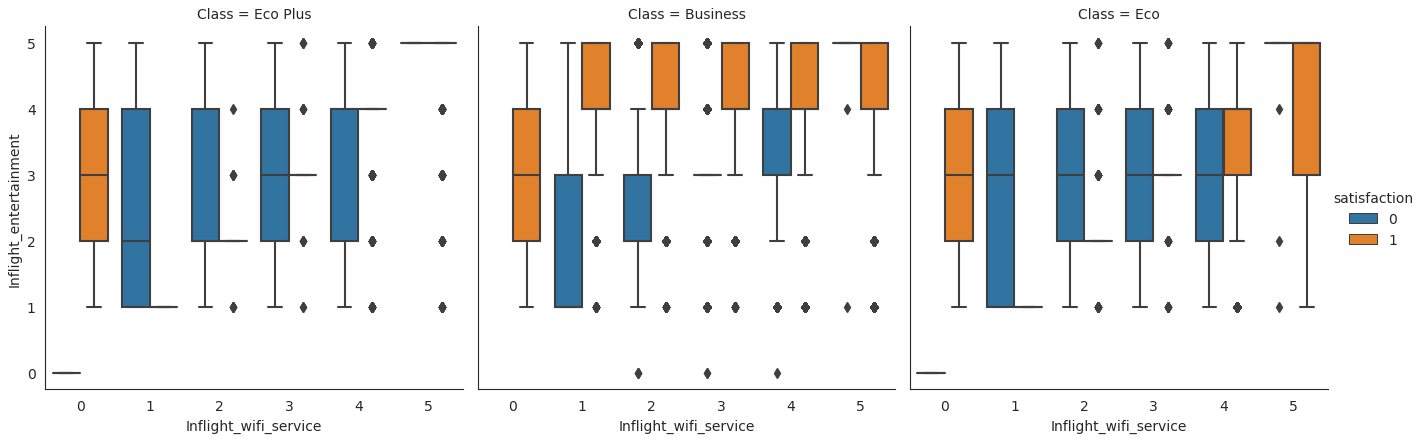

In [18]:
# Inflight_wifi_service and Inflight_entertainment by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)

Untuk Hiburan di Dalam Penerbangan (Inflight Entertainment) dan Layanan Wi-Fi di Dalam Penerbangan (Inflight Wi-Fi Service) yang dikelompokkan berdasarkan Kelas:

Penumpang kelas Eco Plus sebagian besar puas meskipun tanpa layanan wi-fi di dalam penerbangan (rating 0) dan dengan tingkat hiburan di dalam penerbangan yang sedang (rating 2 - 4). 

Untuk penumpang kelas Bisnis, hanya tingkat tertinggi hiburan di dalam penerbangan (rating 5) yang dapat memberikan kepuasan bagi mereka.

Sementara untuk penumpang kelas Eco, tingkat tinggi hiburan di dalam penerbangan (rating 3 - 5) dan ketersediaan layanan wi-fi yang sangat baik (rating 5) dapat membuat mereka puas. Hiburan di Dalam Penerbangan dan Layanan Wi-Fi di Dalam Penerbangan, penumpang kelas Eco Plus sebagian besar puas meskipun tanpa layanan wi-fi dan dengan tingkat hiburan yang sedang. Penumpang kelas Bisnis hanya akan puas dengan tingkat hiburan tertinggi. Sedangkan penumpang kelas Eco akan puas dengan tingkat hiburan yang tinggi dan ketersediaan layanan wi-fi yang sangat baik.

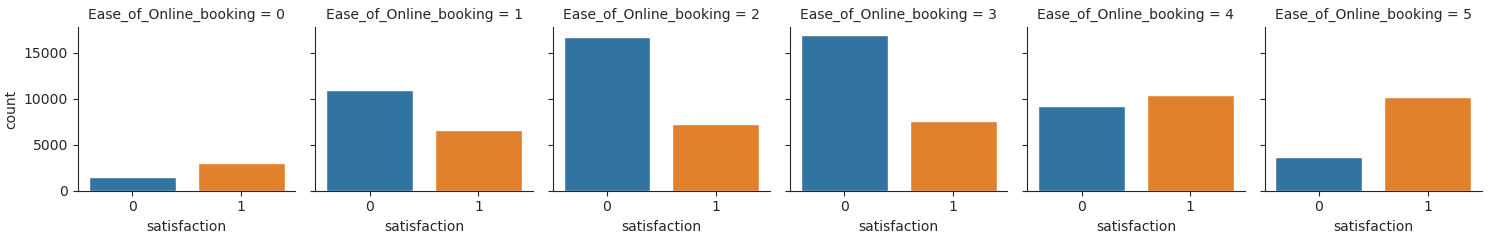

In [19]:
# Ease_of_Online_booking
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

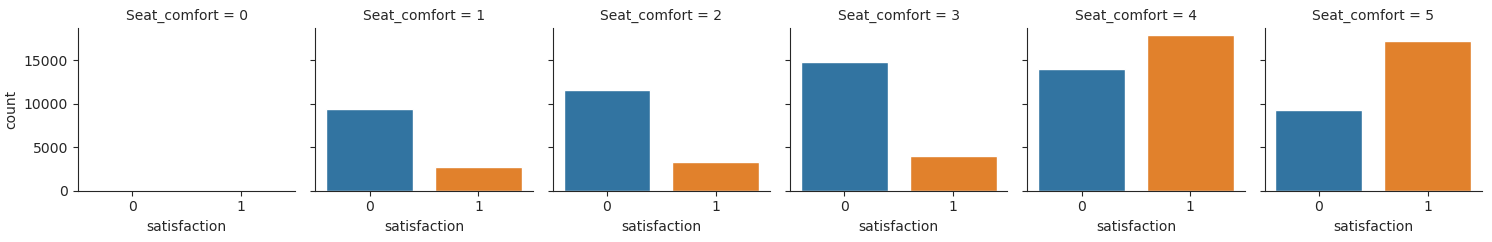

In [20]:
# Seat_comfort
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat_comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

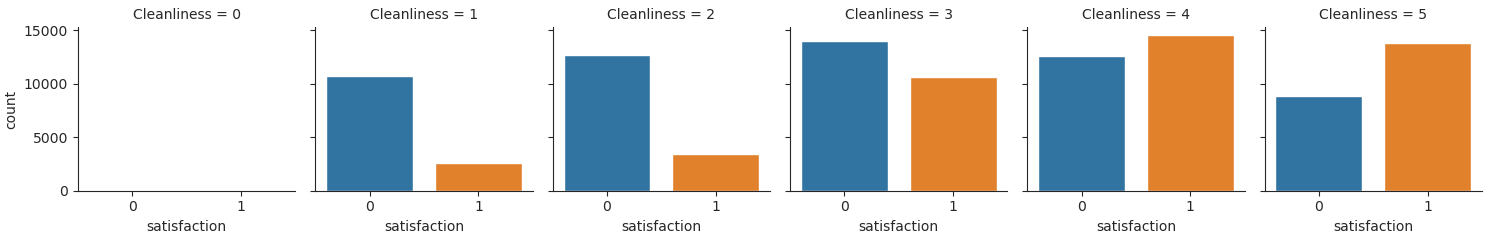

In [21]:
# Cleanliness
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

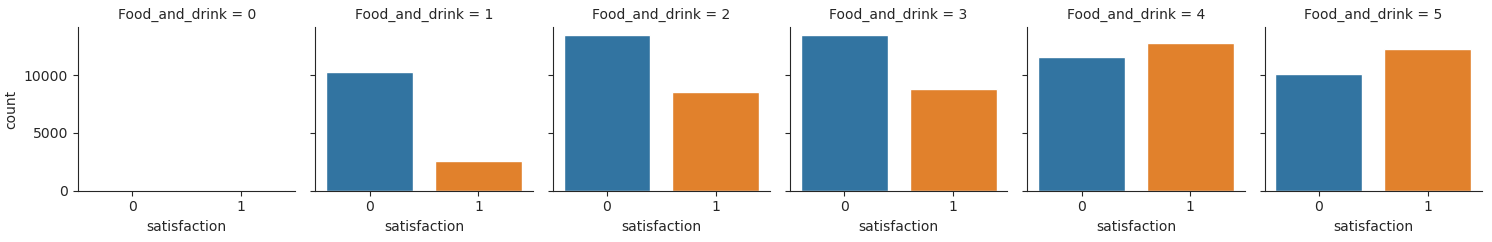

In [22]:
# Food_and_drink
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

Untuk keempat fitur ini, yaitu Kemudahan Pemesanan Online (Ease of Online Booking), Kenyamanan Kursi (Seat Comfort), Kebersihan (Cleanliness), dan Makanan dan Minuman (Food and Drink):

Bagi keempat fitur ini, jumlah penumpang yang puas terbanyak berasal dari kategori yang memberikan rating 4 dan 5. Sedangkan penumpang yang memberikan rating di bawah 4 umumnya netral/tidak puas.fitur-fitur tersebut, yaitu Kemudahan Pemesanan Online, Kenyamanan Kursi, Kebersihan, dan Makanan dan Minuman, penumpang yang memberikan rating 4 dan 5 adalah yang paling puas. Sementara itu, penumpang yang memberikan rating di bawah 4 umumnya netral atau tidak puas.

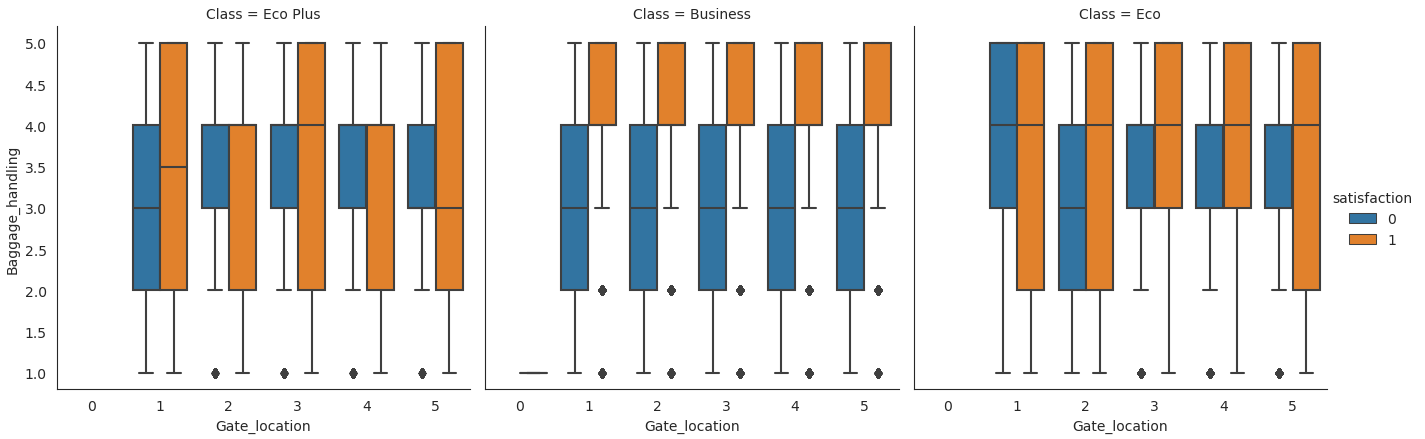

In [23]:
# Gate_location and Baggage_handling by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)

Untuk Lokasi Gerbang (Gate Location) dan Penanganan Bagasi (Baggage Handling) yang dikelompokkan berdasarkan Kelas:

Untuk penumpang kelas bisnis (Business Class), teramati bahwa semua lokasi gerbang memiliki jumlah penumpang yang netral/tidak puas yang lebih tinggi ketika penanganan bagasi tidak mencapai tingkat kepuasan (rating <= 4). 

Untuk kelas Eco Plus, ketika lokasi gerbangnya adalah 1, dan untuk kelas Eco, ketika lokasi gerbangnya adalah 2, bahkan ketika penanganan bagasinya berada pada tingkat yang biasa-biasa saja (rating 2 hingga 4), penumpang tetap netral/tidak puas.dalam kasus penumpang kelas bisnis, semua lokasi gerbang memiliki tingkat ketidakpuasan yang tinggi ketika penanganan bagasi tidak memenuhi harapan (rating <= 4). Sedangkan, untuk kelas Eco Plus dengan lokasi gerbang 1, dan kelas Eco dengan lokasi gerbang 2, penumpang tetap netral/tidak puas meskipun penanganan bagasinya hanya di tingkat yang biasa-biasa saja (rating 2 hingga 4).

<AxesSubplot:xlabel='Inflight_service', ylabel='satisfaction'>

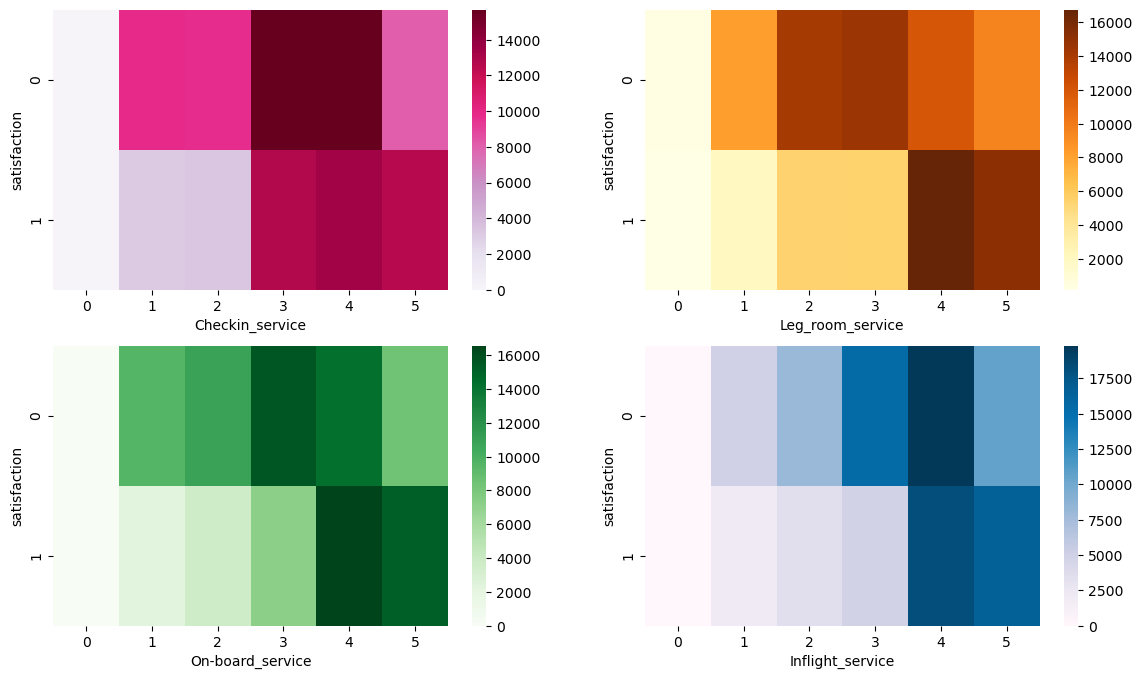

In [24]:
# Checkin_service, Leg_room_service, On-board_service and Inflight_service

fig, axarr = plt.subplots(2, 2, figsize=(14, 8))

table1 = pd.crosstab(train['satisfaction'], train['Checkin_service'])
sns.heatmap(table1, cmap='PuRd', ax = axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Leg_room_service'])
sns.heatmap(table2, cmap='YlOrBr', ax = axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board_service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Inflight_service'])
sns.heatmap(table4, cmap='PuBu', ax = axarr[1][1])

Untuk Layanan Checkin, penumpang yang memberikan rating 0-2 umumnya netral/tidak puas. Untuk tiga layanan lainnya yang disebutkan di atas, hanya pelanggan atau penumpang yang memberikan rating 4 dan 5 yang termasuk dalam kategori penumpang yang puas.Layanan Checkin, mayoritas penumpang yang memberikan rating 0-2 memiliki tingkat kepuasan yang netral atau tidak puas. Namun, untuk tiga layanan lainnya yaitu Leg-room Service, On-board Service, dan Inflight Service, hanya penumpang yang memberikan rating 4 dan 5 yang termasuk dalam kategori penumpang yang puas.

### Penerjemahan Label pada Variabel Kategorikal

In [25]:
# For Train set
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [26]:
# For Test Set
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

### Deteksi dan penghapusan outlier

In [27]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [28]:
# Removal of outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(61197, 23)

### Kolerasi

Correlation Heatmap

<AxesSubplot:>

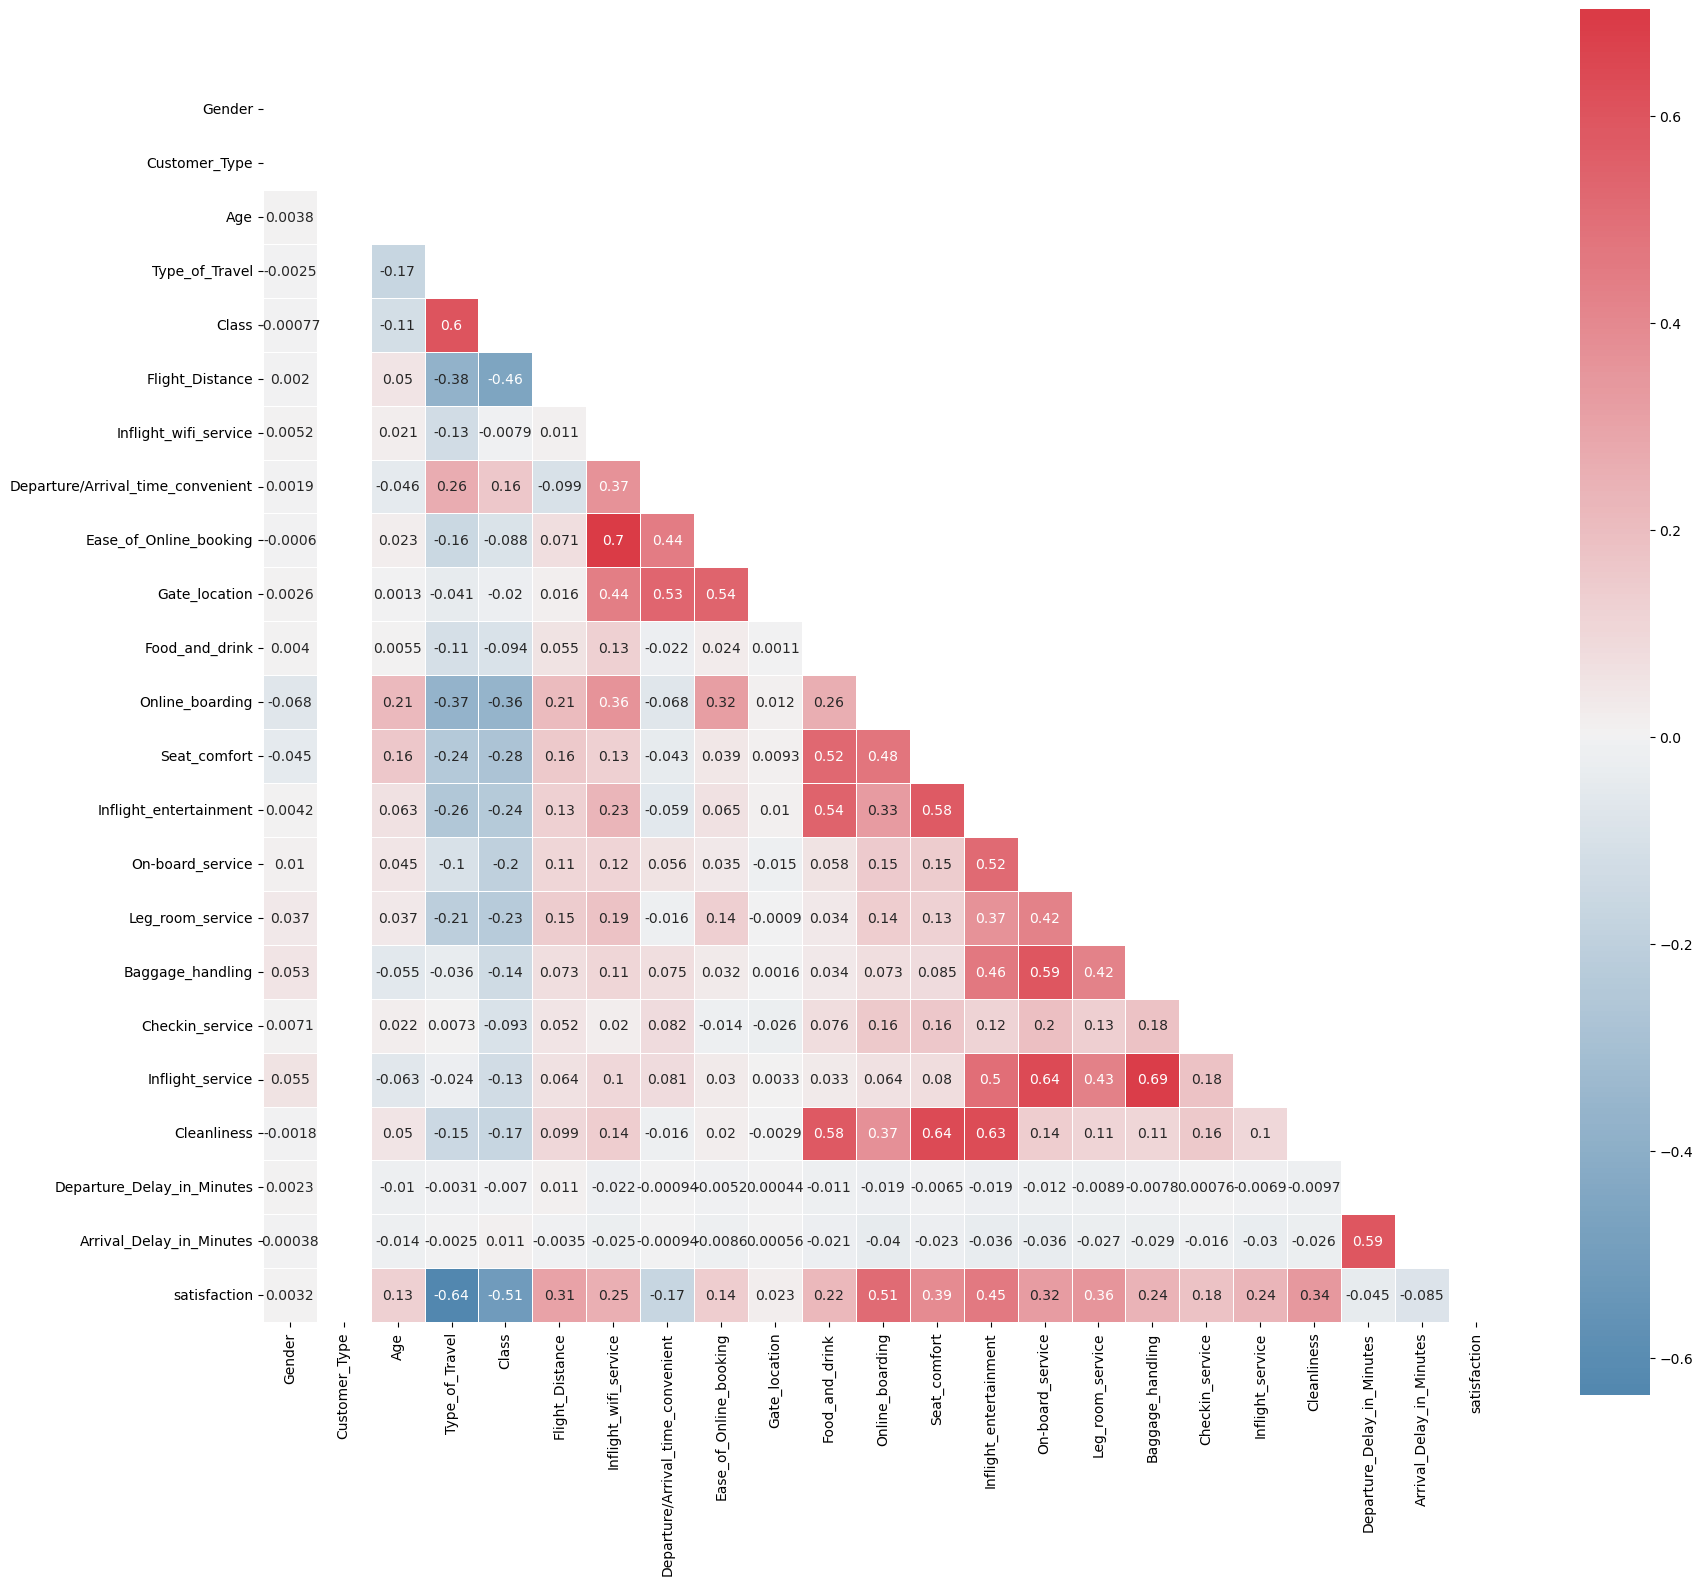

In [29]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

"Ease_of_Online_booking" memiliki korelasi yang tinggi dengan "Inflight_wifi_service", dan "Inflight_service" memiliki korelasi yang tinggi dengan "Baggage_handling". Namun, tidak ada pasangan yang memiliki koefisien korelasi persis sama dengan 1. Oleh karena itu, tidak ada multi-kolinearitas yang sempurna. Oleh karena itu, kita tidak menghapus variabel manapun.ini mengindikasikan adanya hubungan yang kuat antara beberapa pasangan fitur dalam data, tetapi tidak ada hubungan kolinearitas yang sempurna (koefisien korelasi persis 1). Oleh karena itu, tidak perlu menghapus variabel karena masalah multi-kolinearitas.

### Model

In [30]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

#split data test dan data train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

#normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [31]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

#### Logistic Regression

Accuracy = 0.8132891900215584
ROC Area under Curve = 0.8201667535234151
Time taken = 0.9293756484985352
              precision    recall  f1-score   support

           0    0.88771   0.76381   0.82111     14573
           1    0.74384   0.87652   0.80475     11403

    accuracy                        0.81329     25976
   macro avg    0.81578   0.82017   0.81293     25976
weighted avg    0.82455   0.81329   0.81393     25976



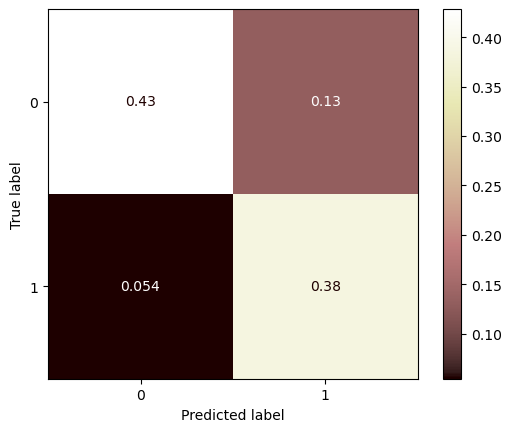

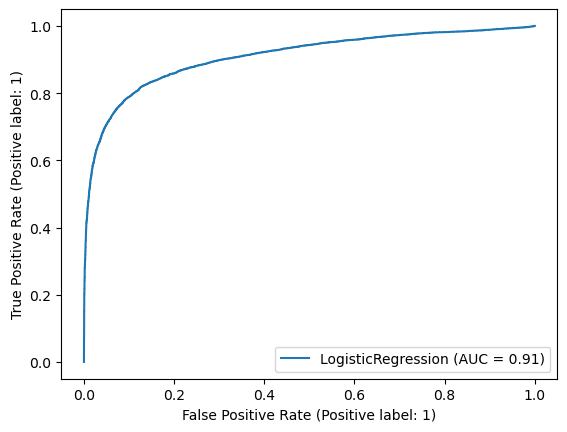

In [32]:
#Regresi Logistik dengan penalti Elastic Net (penalti L1 = 50%, penalti L2 = 50%)
params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [33]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.309527
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                61197
Model:                          Logit   Df Residuals:                    61185
Method:                           MLE   Df Model:                           11
Date:                Sun, 21 May 2023   Pseudo R-squ.:                  0.5533
Time:                        22:54:11   Log-Likelihood:                -18942.
converged:                       True   LL-Null:                       -42406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6437      0.016   -101.562      0.000      -1.675      -1.612
x2             0.2389      0.

Dapat dilihat bahwa di antara 12 fitur, kecuali fitur ke-6 (Inflight_entertainment), 11 fitur lainnya memiliki nilai p-value < 0,05. Jadi, fitur-fitur ini sangat penting dan berpengaruh secara signifikan terhadap variabel target (kepuasan penumpang).

Sebuah nilai pseudo R-square (McFadden's Pseudo R-Squared Value) sebesar 0,55 menunjukkan tingkat kecocokan yang sangat baik.ini mengacu pada analisis statistik yang dilakukan pada data, di mana fitur-fitur tersebut dinilai berdasarkan signifikansinya terhadap variabel target dan nilai pseudo R-square digunakan untuk mengukur kecocokan model.